## Simulating observations with MUSTANG-2

MUSTANG-2 is a bolometric array on the [Green Bank Telescope](https://en.wikipedia.org/wiki/Green_Bank_Telescope). In this notebook we simulate an observation of the Whirlpool Galaxy (M51).

ProjectedMap:
  shape(nu, y, x): (1, 512, 512)
  stokes: naive
  nu: [93.] GHz
  t: naive
  z: naive
  quantity: spectral_flux_density_per_beam
  units: Jy/beam
    min: 0.000e+00
    max: 1.361e+01
  center:
    ra: 13ʰ29ᵐ5.31ˢ
    dec: 47°11’43.00”
  size(y, x): (4.267’, 4.267’)
  resolution(y, x): (0.5”, 0.5”)
  beam(maj, min, rot): (3.36”, 3.181”, -89.2°)
  memory: 4.194 MB


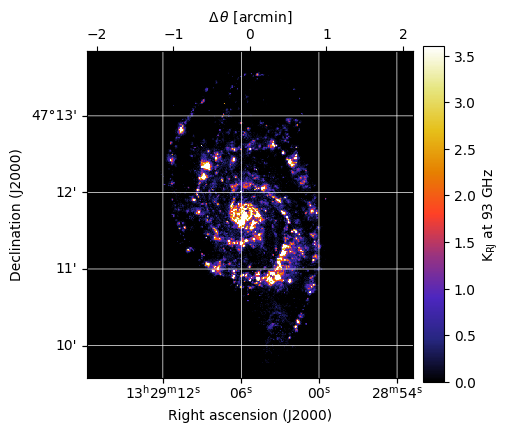

In [1]:
import maria
from maria.io import fetch

input_map = maria.map.load(fetch("maps/M51HA.fits"), nu=93e9)

print(input_map)
input_map.to("K_RJ").plot()

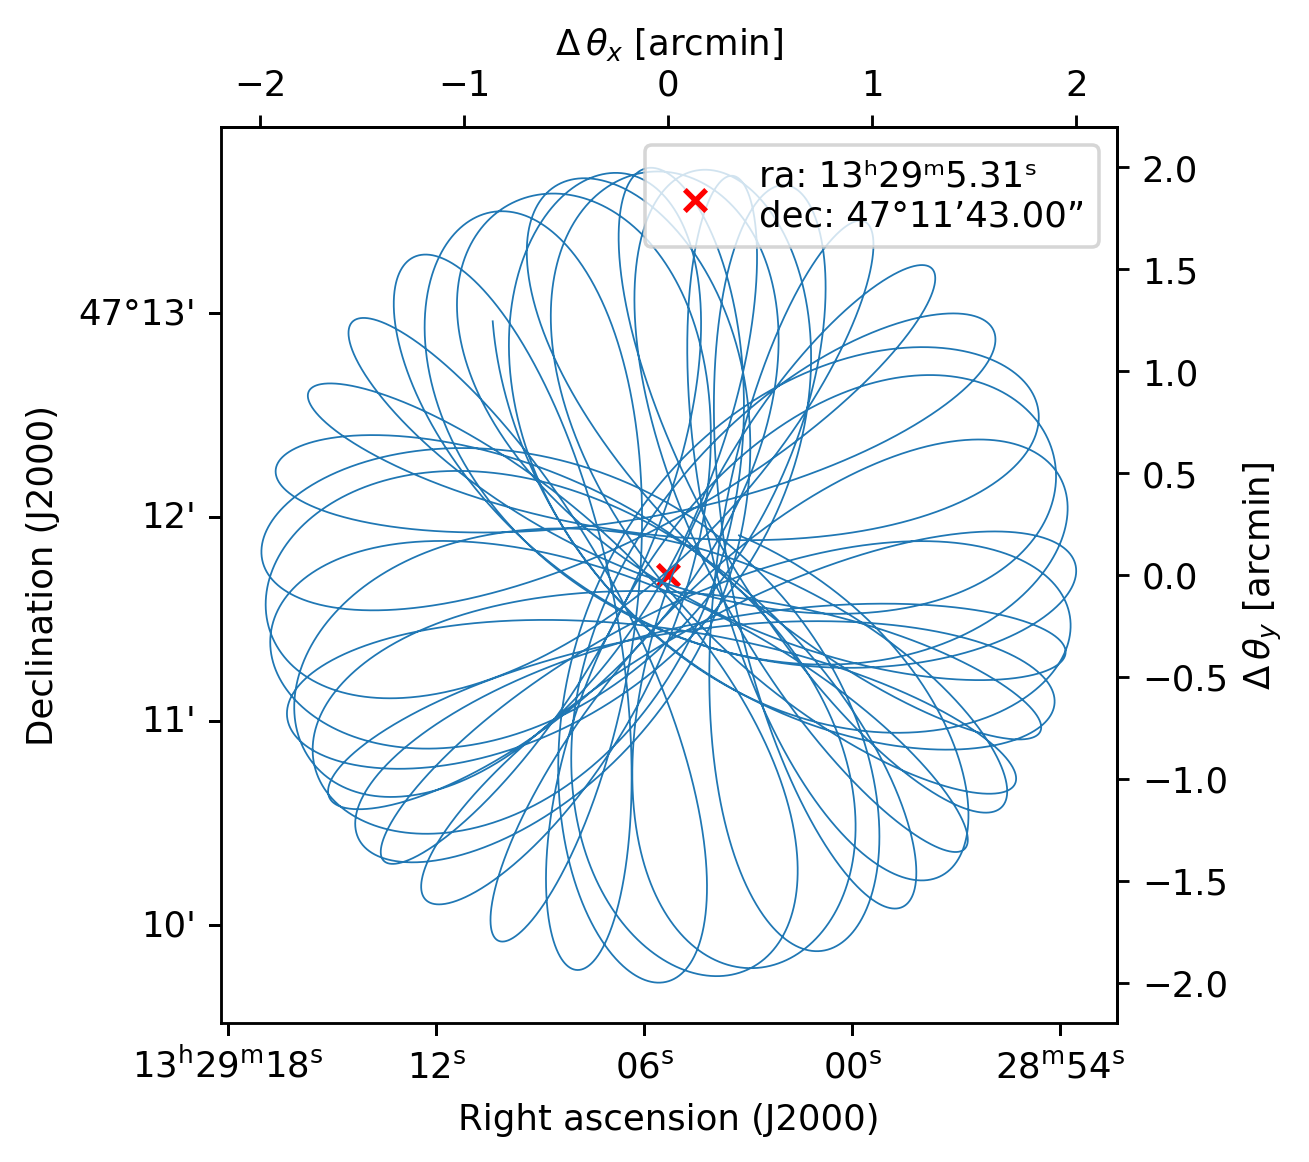

In [2]:
plan = maria.get_plan(
    scan_pattern="daisy",  # scanning pattern
    scan_options={"radius": 2 / 60, "speed": 0.5 / 60},  # in degrees
    duration=600,  # integration time in seconds
    sample_rate=50,  # in Hz
    scan_center=(202.27211, 47.195277),  # position in the sky
    frame="ra_dec",
)

plan.plot()

Instrument(1 array)
├ arrays:
│            n   FOV baseline      bands polarized
│  array1  217  4.2’      0 m  [m2/f093]     False
│ 
└ bands:
         name     center      width    η      NEP       NET_RJ      NET_CMB  \
   0  m2/f093  86.21 GHz  20.98 GHz  0.1  15 aW√s  0.5711 mK√s  0.6905 mK√s   
   
        FWHM  
   0  9.133”  


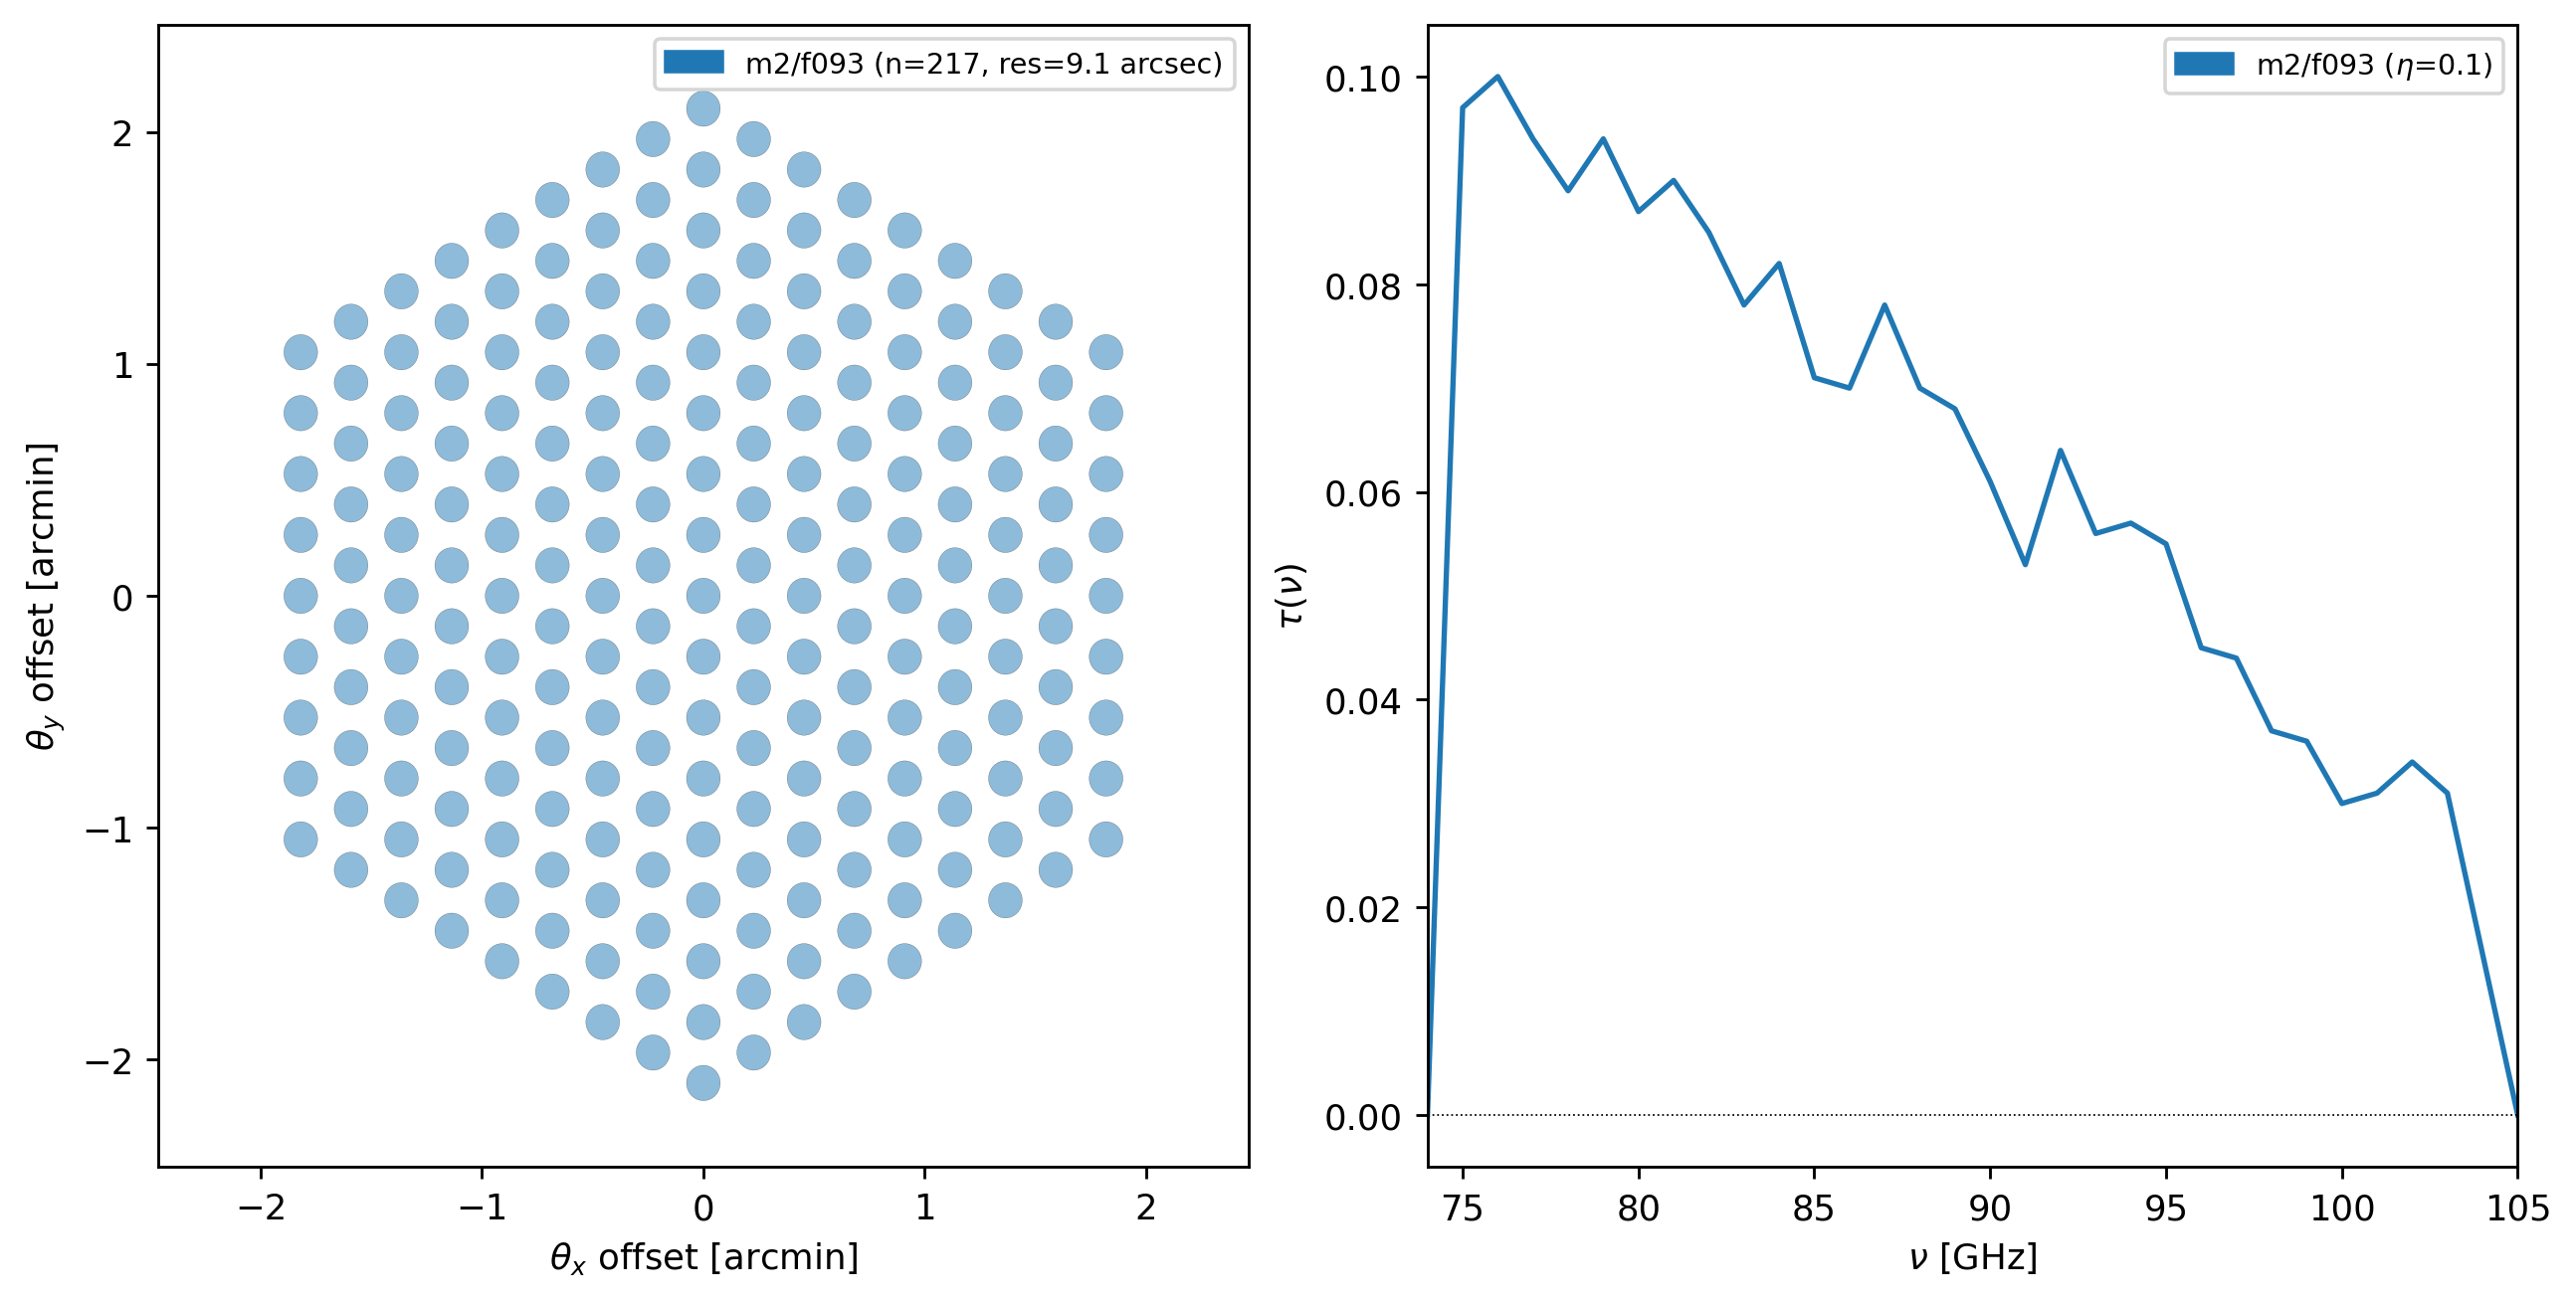

In [3]:
instrument = maria.get_instrument("MUSTANG-2")
print(instrument)
instrument.plot()

In [4]:
sim = maria.Simulation(
    instrument,
    plan=plan,
    site="green_bank",
    map=input_map,
    atmosphere="2d",
)

print(sim)

Constructing atmosphere:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing atmosphere:  10%|█         | 1/10 [00:00<00:04,  1.98it/s]

Constructing atmosphere:  20%|██        | 2/10 [00:00<00:03,  2.06it/s]

Constructing atmosphere:  30%|███       | 3/10 [00:01<00:03,  2.08it/s]

Constructing atmosphere:  40%|████      | 4/10 [00:01<00:02,  2.01it/s]

Constructing atmosphere:  50%|█████     | 5/10 [00:02<00:02,  2.00it/s]

Constructing atmosphere:  60%|██████    | 6/10 [00:02<00:01,  2.04it/s]

Constructing atmosphere:  70%|███████   | 7/10 [00:03<00:01,  2.09it/s]

Constructing atmosphere:  80%|████████  | 8/10 [00:03<00:00,  2.11it/s]

Constructing atmosphere:  90%|█████████ | 9/10 [00:04<00:00,  1.74it/s]

Constructing atmosphere: 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]

Constructing atmosphere: 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │            n   FOV baseline      bands polarized
│ │  array1  217  4.2’      0 m  [m2/f093]     False
│ │ 
│ └ bands:
│          name     center      width    η      NEP       NET_RJ      NET_CMB  \
│    0  m2/f093  86.21 GHz  20.98 GHz  0.1  15 aW√s  0.5711 mK√s  0.6905 mK√s   
│    
│         FWHM  
│    0  9.133”  
├ Site:
│   region: green_bank
│   location: 38°25’59.16”N 79°50’23.28”W
│   altitude: 825 m
│   seasonal: True
│   diurnal: True
├ Plan:
│   start_time: 2024-02-10 06:00:00.000 +00:00
│   duration: 600 s
│   sample_rate: 50 Hz
│   center:
│     ra: 13ʰ29ᵐ5.31ˢ
│     dec: 47°11’43.00”
│   scan_pattern: daisy
│   scan_radius: 3.996’
│   scan_kwargs: {'radius': 0.03333333333333333, 'speed': 0.008333333333333333}
├ Atmosphere(10 processes with 10 layers):
│ ├ spectrum:
│ │   region: green_bank
│ └ weather:
│     region: green_bank
│     altitude: 825 m
│     time: Feb 10 01:04:59 -05:00
│     pwv[mean, rms]: (8.091 mm, 242.7 u

Generating turbulence:   0%|          | 0/10 [00:00<?, ?it/s]

Generating turbulence:  60%|██████    | 6/10 [00:00<00:00, 53.89it/s]

Generating turbulence: 100%|██████████| 10/10 [00:00<00:00, 44.06it/s]

Sampling turbulence:   0%|          | 0/10 [00:00<?, ?it/s]

Sampling turbulence:  10%|█         | 1/10 [00:00<00:07,  1.15it/s]

Sampling turbulence:  20%|██        | 2/10 [00:01<00:03,  2.05it/s]

Sampling turbulence:  30%|███       | 3/10 [00:01<00:02,  2.76it/s]

Sampling turbulence:  40%|████      | 4/10 [00:01<00:01,  3.26it/s]

Sampling turbulence:  50%|█████     | 5/10 [00:01<00:01,  3.64it/s]

Sampling turbulence:  60%|██████    | 6/10 [00:01<00:01,  3.91it/s]

Sampling turbulence:  70%|███████   | 7/10 [00:02<00:00,  3.61it/s]

Sampling turbulence:  80%|████████  | 8/10 [00:02<00:00,  3.88it/s]

Sampling turbulence:  90%|█████████ | 9/10 [00:02<00:00,  4.10it/s]

Sampling turbulence: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]

Sampling turbulence: 100%|██████████| 10/10 [00:02<00:00,  3.40it/s]

Computing atmospheric emission:   0%|          | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093]

Computing atmospheric emission: 100%|██████████| 1/1 [00:01<00:00,  1.67s/it, band=m2/f093]

Computing atmospheric emission: 100%|██████████| 1/1 [00:01<00:00,  1.67s/it, band=m2/f093]

Sampling map:   0%|          | 0/1 [00:00<?, ?it/s]

Sampling map:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093]

Sampling map:   0%|          | 0/1 [00:01<?, ?it/s, channel=[ 0. inf] Hz]

Sampling map: 100%|██████████| 1/1 [00:02<00:00,  2.27s/it, channel=[ 0. inf] Hz]

Sampling map: 100%|██████████| 1/1 [00:02<00:00,  2.27s/it, channel=[ 0. inf] Hz]

Generating noise:   0%|          | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093]

Generating noise: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s, band=m2/f093]

Generating noise: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s, band=m2/f093]

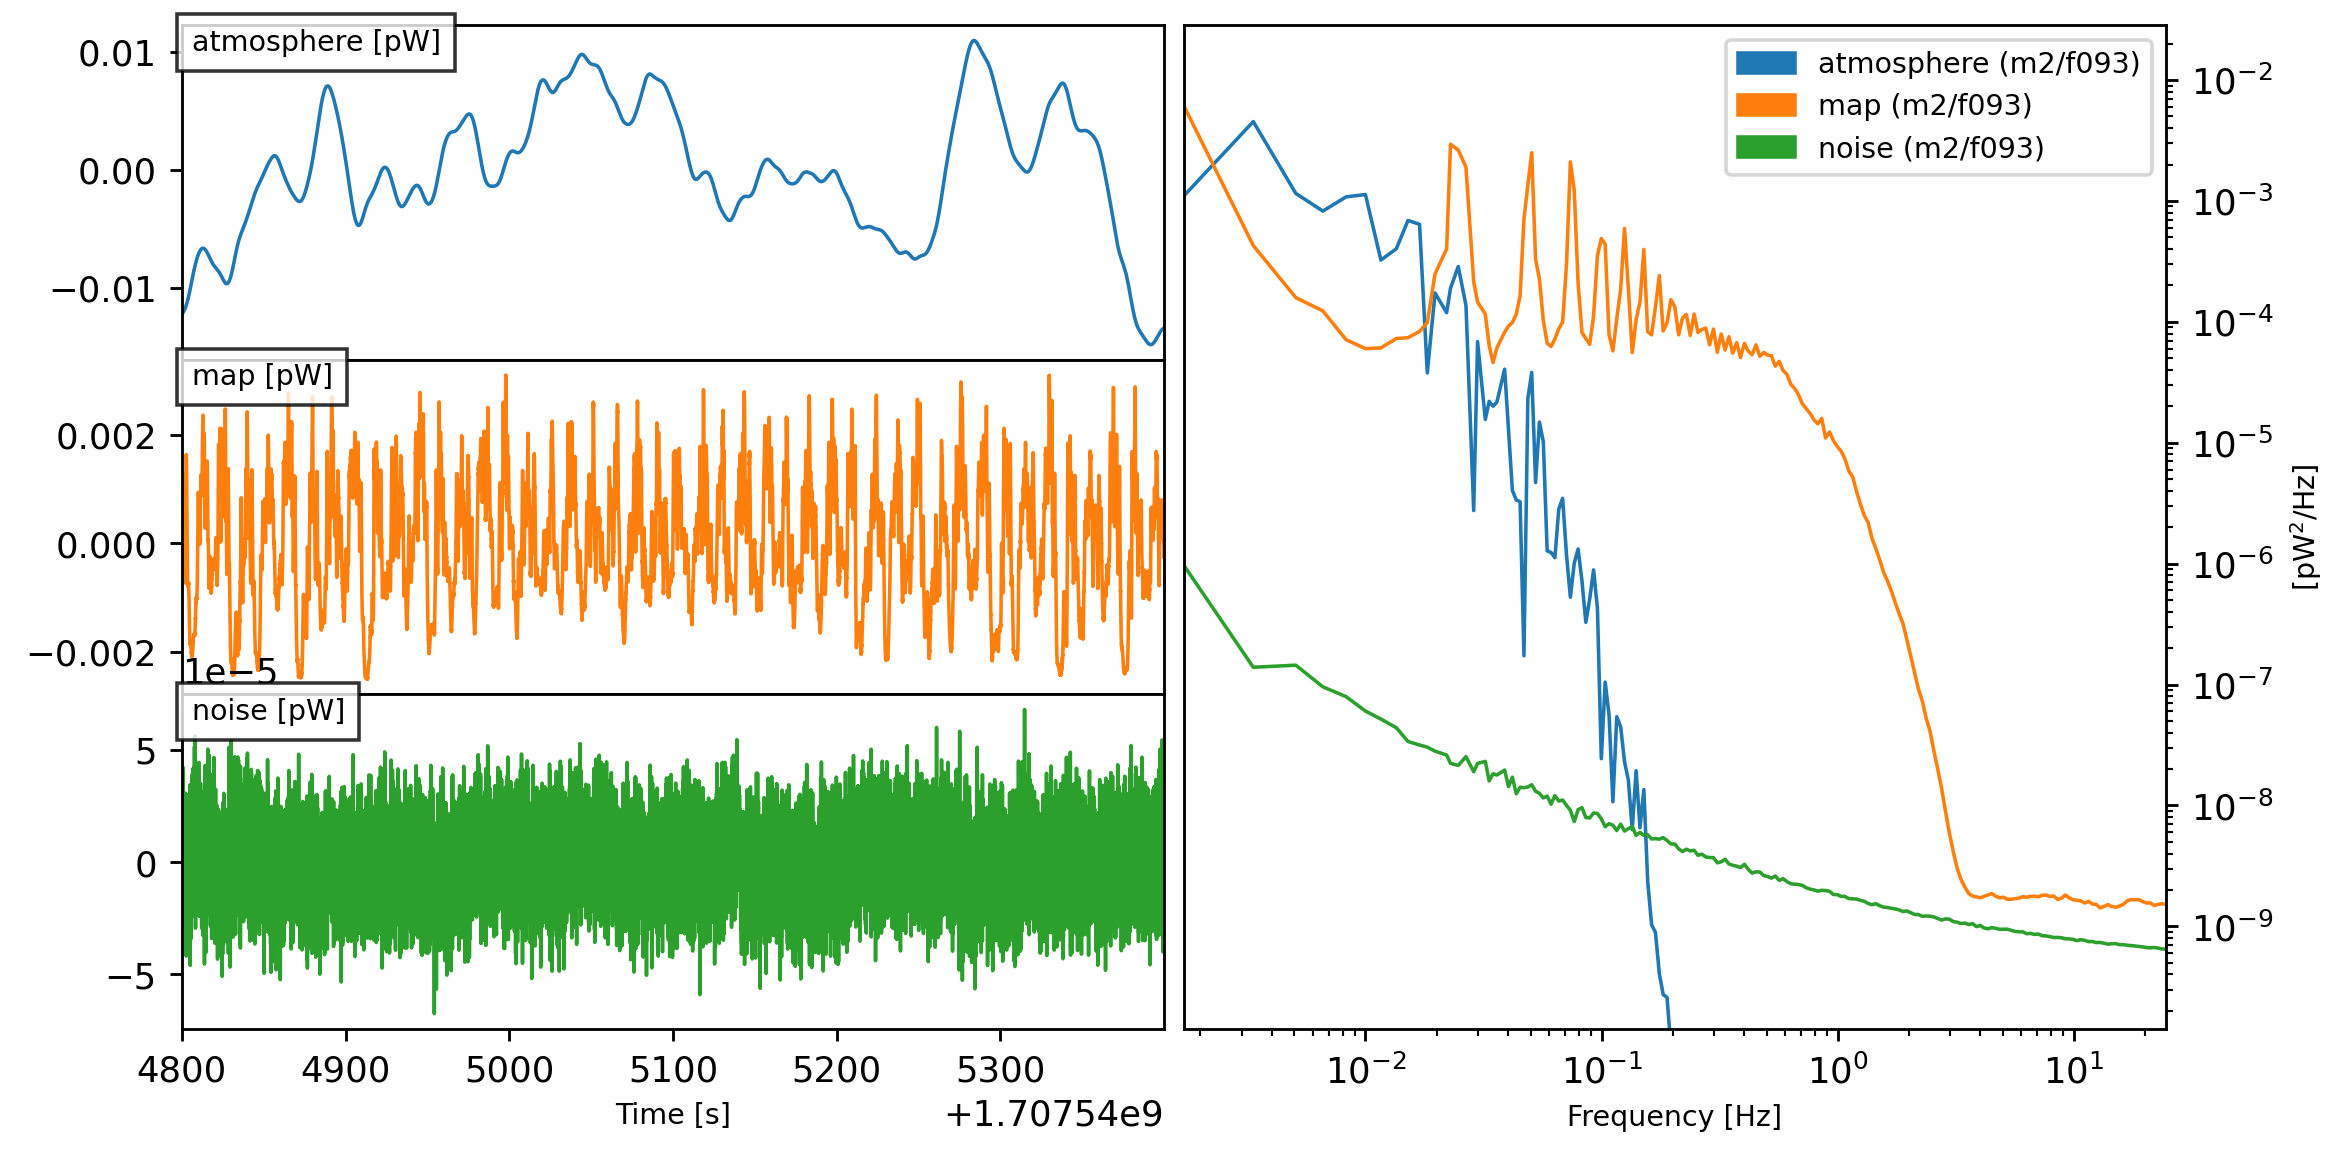

In [5]:
tod = sim.run()
tod.plot()

In [6]:
from maria.mappers import BinMapper

mapper = BinMapper(
    center=(202.27211, 47.195277),
    frame="ra_dec",
    width=6 / 60,
    height=6 / 60,
    resolution=0.03 / 60,
    tod_preprocessing={
        "window": {"name": "hamming"},
        "remove_modes": {"modes_to_remove": [0]},
        "remove_spline": {"knot_spacing": 30, "remove_el_gradient": True},
    },
    map_postprocessing={
        "gaussian_filter": {"sigma": 1},
        "median_filter": {"size": 1},
    },
    units="uK_RJ",
)

mapper.add_tods(tod)
output_map = mapper.run()

Mapping band m2/f093:   0%|          | 0/1 [00:00<?, ?it/s]

Mapping band m2/f093:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093, stokes=I]

Mapping band m2/f093: 100%|██████████| 1/1 [00:00<00:00, 20.48it/s, band=m2/f093, stokes=I]


2025-06-20 14:48:06.852 INFO: Ran mapper for band m2/f093 in 2.9 s.


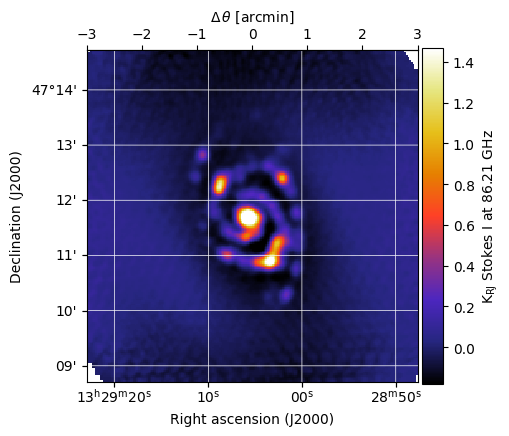

In [7]:
output_map.plot()
output_map.to_fits("/tmp/simulated_mustang_map.fits")